# Hypthesis test: a paired one-sample $t$-test

**date**
: 2021-04-17

**data**
: `darwin.csv`

**ref**
: Computer book B, Activity 25(a)

**desc**
: Performing a paired one-sample $t$-**test** where the difference between two samples is calculated.

In [1]:
from scripts.data import Data
from scipy.stats import t, probplot, ttest_1samp
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
darwin = Data.load_darwin()

In [3]:
darwin.head()

,Cross,Self
0,188,139
1,96,163
2,168,160
3,176,160
4,153,147


Charles Darwin, one of the people who introduced the theory of evolution, measured the heights of fifteen pairs of plants of the species Zea mays, that is, maize or corn. Each plant had parents grown from the same seed – one plant in each pair was the offspring of a cross-fertilisation, the other of a self-fertilisation.
The key feature of these data is that the two height measurements within each pair are not independent, since the two plants within a pair are genetically related.
For each pair, the difference between the heights of the plants can be found.

Let the hypotheses be

$$
H_{0} : \mu_{D} = 0, \hspace{3mm} H_{1} : \mu_{D} \neq 0,
$$

where $\mu_{D}$ is the mean difference between the heights of paired plants.

Add a column to the `DataFrame` that contains the difference between `Cross` and `Self`.

In [4]:
darwin["Diff"] = darwin["Cross"] - darwin["Self"]

In [5]:
darwin.head()

,Cross,Self,Diff
0,188,139,49
1,96,163,-67
2,168,160,8
3,176,160,16
4,153,147,6


Check that `Diff` can be modelled using a normal distribution.

In [6]:
# reference to the Diff col
diff = darwin["Diff"]

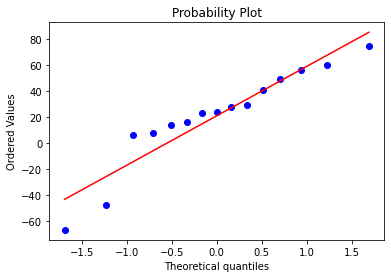

In [7]:
f, ax = plt.subplots()
probplot(
    x=diff,
    plot=ax
)
plt.show()

The normal probability plot suggests that an assumption of normality is plausible.

Perform the hypothesis test using `scipy.stats.ttest_1samp`

In [8]:
# returns (t, p)
ttest_1samp(
    a=diff,
    popmean=0
)

Ttest_1sampResult(statistic=2.1479874613311205, pvalue=0.04970294402180089)

Therefore $t \simeq 2.148, \> p \simeq 0.0479$.

Since $p \in$ (0.01, 0.05], there is moderate evidence against the null hypothesis that the plants differ in mean height.
Indeed, since the $\overline{X}_{D} \simeq$ 20.93, the data suggest that cross-fertilised plants are taller on average than self-fertilised plants.

In [15]:
help(ttest_1samp)

Help on function ttest_1samp in module scipy.stats.stats:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided')
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a two-sided test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        Sample observation.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then it must have the
        same shape as `a` excluding the axis dimension.
    axis : int or None, optional
        Axis along which to compute test; default is 0. If None, compute over
        the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'propagate': re